In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
data.drop(['Customer','Effective To Date'],axis=1,inplace=True)

In [7]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

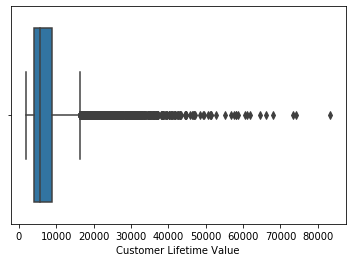

In [8]:
sns.boxplot(data['Customer Lifetime Value'])

In [9]:
data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [10]:
he=data['Customer Lifetime Value'].quantile(0.75)+(1.5*(data['Customer Lifetime Value'].quantile(0.75)-data['Customer Lifetime Value'].quantile(0.25)))
df1=data[data['Customer Lifetime Value']<he]

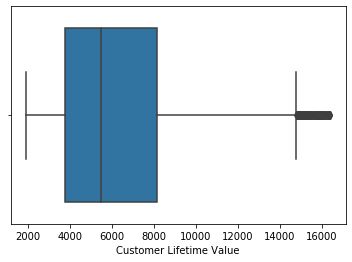

In [11]:
sns.boxplot(df1['Customer Lifetime Value'])

In [12]:
he1=df1['Customer Lifetime Value'].quantile(0.75)+(1.5*(df1['Customer Lifetime Value'].quantile(0.75)-df1['Customer Lifetime Value'].quantile(0.25)))
len(df1[df1['Customer Lifetime Value']>he1])

173

In [13]:
df2=df1[~(df1['Customer Lifetime Value']>he1)]

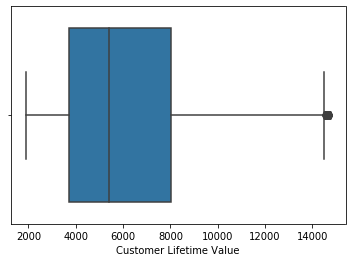

In [14]:
sns.boxplot(df2['Customer Lifetime Value'])

In [15]:
df1.shape

(8317, 22)

In [16]:
df2.shape

(8144, 22)

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
le=LabelEncoder()
df1[df1.select_dtypes(include='object').columns]=df1[df1.select_dtypes(include='object').columns].apply(le.fit_transform)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
df1

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1,4100.398533,0,2,1,1,0,47761,1,2,...,58,0,1,1,4,0,1,541.282007,0,0
9130,1,3096.511217,1,1,1,1,0,21604,1,0,...,28,0,1,0,2,0,1,379.200000,0,1
9131,1,8163.890428,0,1,0,4,1,0,1,2,...,37,3,2,0,1,0,1,790.784983,0,1
9132,1,7524.442436,0,1,1,1,1,21941,1,1,...,3,0,3,1,4,2,1,691.200000,0,0


In [20]:
X=df1.drop('Customer Lifetime Value',axis=1)
y=df1['Customer Lifetime Value']

In [21]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.288
Model:                                 OLS   Adj. R-squared:                  0.286
Method:                      Least Squares   F-statistic:                     159.7
Date:                     Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                             16:11:08   Log-Likelihood:                -77619.
No. Observations:                     8317   AIC:                         1.553e+05
Df Residuals:                         8295   BIC:                         1.554e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1284.4146    218.691      5.873      0.000     855.725    1713.104
State                           -16.5700     23.347     -0.710      0.478     -62.336      29.196
Response                       -186.7510     87.665     -2.130      0.033    -358.597     -14.905
Coverage                        217.7156     52.623      4.137      0.000     114.562     320.869
Education                        35.9061     21.847      1.643      0.100      -6.920      78.732
EmploymentStatus                -78.8131     33.591     -2.346      0.019    -144.659     -12.967
Gender                           50.7563     60.547      0.838      0.402     -67.931     169.443
Income                            0.0025      0.001      1.704      0.088      -0.000       0.005
Location Code                    79.7544     53.299      1.496      0.135     -24.725     184.234
Marital Status                  -81.5143     50.733     -1.607      0.108    -180.965      17.936
Monthly Premium Auto             48.1937      1.447     33.308      0.000      45.357      51.030
Months Since Last Claim          -4.3583      3.000     -1.453      0.146     -10.239       1.522
Months Since Policy Inception    -1.7153      1.083     -1.585      0.113      -3.837       0.407
Number of Open Complaints      -102.2535     32.440     -3.152      0.002    -165.845     -38.662
Number of Policies              326.0285     12.232     26.654      0.000     302.051     350.006
Policy Type                     293.4751    132.849      2.209      0.027      33.059     553.892
Policy                          -62.2233     39.425     -1.578      0.115    -139.506      15.059
Renew Offer Type               -211.9262     31.260     -6.779      0.000    -273.203    -150.649
Sales Channel                   -10.7530     28.406     -0.379      0.705     -66.436      44.930
Total Claim Amount               -0.4875      0.171     -2.856      0.004      -0.822      -0.153
Vehicle Class                    44.2354     14.736      3.002      0.003      15.348      73.122
Vehicle Size                     74.1133     56.355      1.315      0.189     -36.357     184.583
==============================================================================
Omnibus:                     2045.569   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4201.846
Skew:                           1.466   Prob(JB):                         0.00
Kurtosis:                       4.878   Cond. No.                     3.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [22]:
le=LabelEncoder()
df2[df2.select_dtypes(include='object').columns]=df2[df2.select_dtypes(include='object').columns].apply(le.fit_transform)

In [23]:
df2.head(5)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [24]:
X=df2.drop('Customer Lifetime Value',axis=1)
y=df2['Customer Lifetime Value']

In [25]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.293
Model:                                 OLS   Adj. R-squared:                  0.291
Method:                      Least Squares   F-statistic:                     160.4
Date:                     Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                             16:11:09   Log-Likelihood:                -75278.
No. Observations:                     8144   AIC:                         1.506e+05
Df Residuals:                         8122   BIC:                         1.508e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1498.3996    203.554      7.361      0.000    1099.382    1897.418
State                           -24.3556     21.564     -1.129      0.259     -66.627      17.916
Response                       -112.1304     80.711     -1.389      0.165    -270.345      46.084
Coverage                        240.2110     49.153      4.887      0.000     143.859     336.563
Education                        26.1976     20.233      1.295      0.195     -13.464      65.859
EmploymentStatus                -86.4640     31.046     -2.785      0.005    -147.322     -25.606
Gender                           86.8227     55.968      1.551      0.121     -22.888     196.534
Income                            0.0032      0.001      2.304      0.021       0.000       0.006
Location Code                    54.2790     49.318      1.101      0.271     -42.398     150.956
Marital Status                  -81.0257     46.802     -1.731      0.083    -172.770      10.719
Monthly Premium Auto             43.3461      1.390     31.186      0.000      40.622      46.071
Months Since Last Claim          -3.4034      2.771     -1.228      0.219      -8.834       2.028
Months Since Policy Inception    -2.1509      1.000     -2.150      0.032      -4.112      -0.190
Number of Open Complaints      -109.0196     30.006     -3.633      0.000    -167.838     -50.201
Number of Policies              339.7818     11.267     30.157      0.000     317.695     361.868
Policy Type                     272.1069    122.660      2.218      0.027      31.662     512.552
Policy                          -55.4702     36.437     -1.522      0.128    -126.896      15.956
Renew Offer Type               -234.0860     28.925     -8.093      0.000    -290.787    -177.385
Sales Channel                    -6.1315     26.266     -0.233      0.815     -57.619      45.356
Total Claim Amount               -0.3182      0.160     -1.991      0.047      -0.632      -0.005
Vehicle Class                    32.9503     13.615      2.420      0.016       6.260      59.640
Vehicle Size                     70.3274     52.149      1.349      0.178     -31.897     172.552
==============================================================================
Omnibus:                     1786.759   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3285.962
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                       4.395   Cond. No.                     3.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [26]:
def algo(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    print('{} train score:{}'.format(model,model.score(X_train,y_train)))
    print('{} test score:{}'.format(model,model.score(X_test,y_test)))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
lr=LinearRegression()
algo(lr,X_train,X_test,y_train,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) train score:0.2919966089452365
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) test score:0.29396893561960735


In [28]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
algo(dt,X_train,X_test,y_train,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:1.0
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.9273640466368115


In [29]:
from sklearn.model_selection import GridSearchCV
gsv=GridSearchCV(dt,param_grid={'max_depth':range(1,10)})
gsv.fit(X_train,y_train)
gsv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
dt1=DecisionTreeRegressor(max_depth=4)
algo(dt1,X_train,X_test,y_train,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:0.9239715810738711
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.9154475195410622


In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
algo(rfr,X_train,X_test,y_train,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) train score:0.9922346207309408
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) test score:0.9527969077232544


In [32]:
gsv=GridSearchCV(rfr,param_grid={'max_depth':range(1,10),'n_estimators':range(10,30)})
gsv.fit(X_train,y_train)
gsv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=19,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
rfr1=RandomForestRegressor(max_depth=9,n_estimators=24)
algo(rfr1,X_train,X_test,y_train,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) train score:0.977074129615682
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) test score:0.956213301885147


In [34]:
from sklearn.ensemble import BaggingRegressor
bag= BaggingRegressor(dt1)
algo(bag,X_train,X_test,y_train,y_test)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=4,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
boost= AdaBoostRegressor(rfr1)
algo(boost,X_train,X_test,y_train,y_test)

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
models=[lr,dt,dt1,rfr,rfr1,bag,boost]
for model in models:
    cv_results = model_selection.cross_val_score(model,X,y,cv = kfold)
    print(model,np.mean(cv_results),np.var(cv_results,ddof=1))